## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

# 使用nesterov，並將momentum改為0.8

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.8

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use

50000/50000 [==============================] - 4s 88us/step - loss: 0.9542 - acc: 0.6561 - val_loss: 1.6811 - val_acc: 0.4685
Epoch 49/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.9368 - acc: 0.6618 - val_loss: 1.8288 - val_acc: 0.4611
Epoch 50/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.9307 - acc: 0.6611 - val_loss: 2.0580 - val_acc: 0.4517
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)

Epoch 50/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.6707 - acc: 0.7665 - val_loss: 1.4875 - val_acc: 0.5286
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.2875 - acc: 0.1396 - val_loss: 2.2601 - val_acc: 0.1693
Epoch 2/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.2405 - acc: 0.1829 - val_loss: 2.2243 - val_acc: 0.2063
Epoch 3/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.2080 - acc: 0.2186 - val_loss: 2.1941 - val_acc: 0.2327
Epoch 4/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.1797 - acc: 0.2393 - val_loss: 2.1670 - val_acc: 0.2527
Epoch 5/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.1540 - acc: 0.2562 - val_loss: 2.1422 - val_acc: 0.2604
Epoch 6/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.1303 - acc: 0.2673 - val_loss: 2.1195 - val_acc: 0.2704
Epoch 7/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.1083 - acc: 0.2761 - val_loss: 2.0985 - val_acc

50000/50000 [==============================] - 4s 88us/step - loss: 2.3033 - acc: 0.1000 - val_loss: 2.2994 - val_acc: 0.1037
Epoch 3/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.2944 - acc: 0.1039 - val_loss: 2.2917 - val_acc: 0.1076
Epoch 4/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.2876 - acc: 0.1129 - val_loss: 2.2856 - val_acc: 0.1186
Epoch 5/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.2820 - acc: 0.1240 - val_loss: 2.2804 - val_acc: 0.1314
Epoch 6/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.2771 - acc: 0.1375 - val_loss: 2.2758 - val_acc: 0.1432
Epoch 7/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.2728 - acc: 0.1478 - val_loss: 2.2715 - val_acc: 0.1519
Epoch 8/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.2687 - acc: 0.1554 - val_loss: 2.2675 - val_acc: 0.1569
Epoch 9/50
50000/50000 [============================

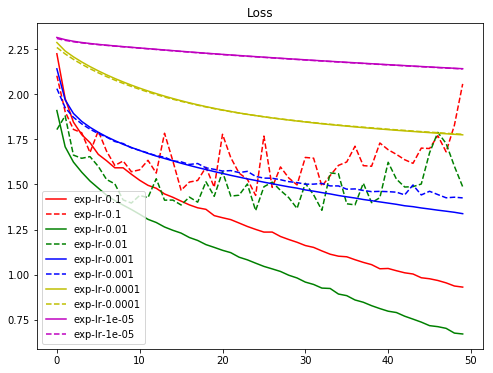

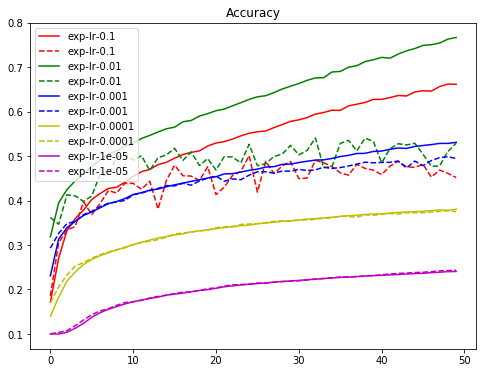

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# 不使用nesterov

In [9]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.8888 - acc: 0.3158 - val_loss: 1.6950 - val_acc: 0.3875
Epoch 2/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6745 - acc: 0.3997 - val_loss: 1.6384 - val_acc: 0.4137
Epoch 3/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5842 - acc: 0.4329 - val_loss: 1.5516 - val_acc: 0.4432
Epoch 4/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5348 - acc: 0.4522 - val_loss: 1.5762 - val_acc: 0.4384
Epoch 5/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.4872 - acc: 0.4675 - val_loss: 1.4906 - val_acc: 0.4699
Epoch 6/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.4548 - acc: 0.4799 - val_loss: 1.4913 - val_acc: 0.4645
Epoch 7/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.4312 - acc: 0.4892 - val_loss: 1.4817 - val_acc

50000/50000 [==============================] - 4s 85us/step - loss: 1.8267 - acc: 0.3532 - val_loss: 1.7733 - val_acc: 0.3779
Epoch 3/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.7389 - acc: 0.3874 - val_loss: 1.7081 - val_acc: 0.3967
Epoch 4/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.6769 - acc: 0.4124 - val_loss: 1.6629 - val_acc: 0.4077
Epoch 5/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.6347 - acc: 0.4259 - val_loss: 1.6093 - val_acc: 0.4394
Epoch 6/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.5942 - acc: 0.4408 - val_loss: 1.5784 - val_acc: 0.4430
Epoch 7/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.5627 - acc: 0.4527 - val_loss: 1.5519 - val_acc: 0.4533
Epoch 8/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.5262 - acc: 0.4628 - val_loss: 1.5264 - val_acc: 0.4604ss: 1
Epoch 9/50
50000/50000 [=======================

50000/50000 [==============================] - 4s 85us/step - loss: 2.0585 - acc: 0.2725 - val_loss: 2.0297 - val_acc: 0.2764l - ETA: 0s - loss: 2.06
Epoch 4/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.0025 - acc: 0.2935 - val_loss: 1.9820 - val_acc: 0.30185 -  - ETA: 0s - loss: 2.00
Epoch 5/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.9600 - acc: 0.3143 - val_loss: 1.9448 - val_acc: 0.3158
Epoch 6/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.9260 - acc: 0.3267 - val_loss: 1.9161 - val_acc: 0.3270
Epoch 7/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.8990 - acc: 0.3384 - val_loss: 1.8900 - val_acc: 0.3430
Epoch 8/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.8768 - acc: 0.3440 - val_loss: 1.8702 - val_acc: 0.3495
Epoch 9/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.8577 - acc: 0.3531 - val_loss: 1.8539 - val_acc: 0.3520
E

50000/50000 [==============================] - 4s 86us/step - loss: 2.2416 - acc: 0.1894 - val_loss: 2.2312 - val_acc: 0.1984
Epoch 5/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.2257 - acc: 0.2001 - val_loss: 2.2159 - val_acc: 0.2047
Epoch 6/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.2109 - acc: 0.2087 - val_loss: 2.2016 - val_acc: 0.2105
Epoch 7/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.1970 - acc: 0.2170 - val_loss: 2.1880 - val_acc: 0.2191
Epoch 8/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.1835 - acc: 0.2235 - val_loss: 2.1749 - val_acc: 0.2258
Epoch 9/50
50000/50000 [==============================] - 4s 86us/step - loss: 2.1706 - acc: 0.2282 - val_loss: 2.1623 - val_acc: 0.2345
Epoch 10/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.1582 - acc: 0.2357 - val_loss: 2.1501 - val_acc: 0.2417
Epoch 11/50
50000/50000 [==========================

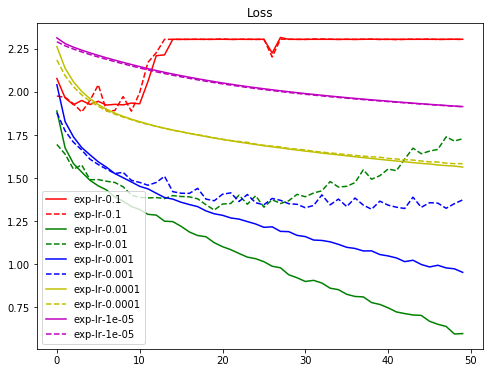

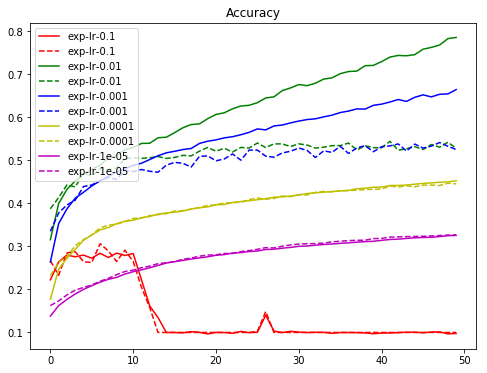

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()